### Loading Libraries and Data

The dataset is a sample dataset from IBM used to predict customer churn status to develop customer retention programs.

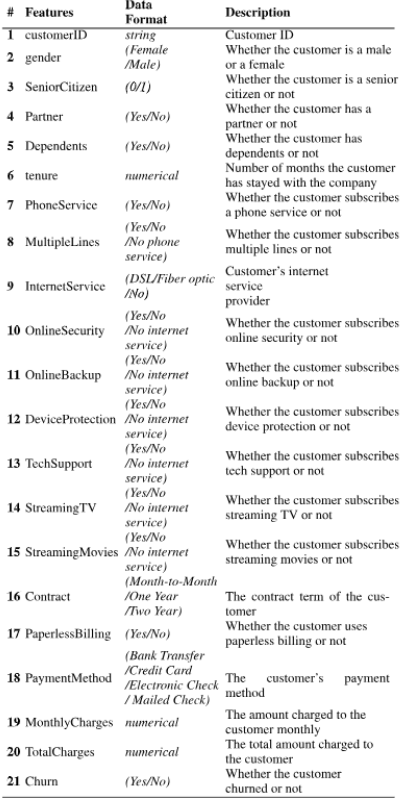

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 


In [2]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Don't truncate column content
np.set_printoptions(threshold=np.inf)  # Show full NumPy arrays


In [3]:
RAW_DATA_PATH = os.path.join('../data', 'raw') 
INTERM_DATA_PATH = os.path.join('../data', 'interim')
RAW_DATASET_PATH = os.path.join(RAW_DATA_PATH,'Telco-Customer-Churn.csv' )

In [4]:
df = pd.read_csv(RAW_DATASET_PATH)
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Target column: Churn

No Null values in the dataframe. 

Dtype conversion: 
- TotalCharges: float
- PaymentMethod, Contract, MultipleLines:       categorical
- Churn, PaperlessBilling , OnlineSecurity  ,OnlineBackup    , DeviceProtectio , TechSupport  , StreamingTV    ,  StreamingMovies -> binary
gender , Partner, Dependents,  PhoneService: binary


In [6]:
string_columns = ['customerID']
bool_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'SeniorCitizen']
category_columns = [
    'gender', 
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'InternetService', 'Contract', 'PaymentMethod'
]
int_columns = ['tenure']
float_columns = ['MonthlyCharges', 'TotalCharges']

len(string_columns+bool_columns+category_columns+int_columns+float_columns) == len(df.columns)


True

### Data Preperation

In [7]:
drop_columns = ['customerID']
df_proc = df.drop(columns=drop_columns, axis=1)


#### Data type conversion

Extracting Non-Numeric values in `TotalCharges` column:

In [8]:
non_numeric_mask = pd.to_numeric(df['TotalCharges'], errors='coerce').isna()
non_numeric_values = df.loc[non_numeric_mask, 'TotalCharges'].unique()

print("Non-numeric unique values in TotalCharges:")
print(non_numeric_values)


Non-numeric unique values in TotalCharges:
[' ']


In [9]:
df_proc.loc[non_numeric_mask,['TotalCharges']] = np.nan
df_proc['TotalCharges']=pd.to_numeric(df_proc['TotalCharges'])
df_proc.loc[df_proc.TotalCharges.isna(),:]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.

In [10]:
df_proc.drop(labels = df_proc.loc[df_proc.TotalCharges.isna(),:].index,axis=0,inplace = True)

In [11]:
def display_unique_values(df, columns):
    for column in columns:
        print(f"Unique values in {column}:")
        print(df[column].unique())
        print("\n")


In [12]:
display_unique_values(df_proc, bool_columns)

Unique values in Partner:
['Yes' 'No']


Unique values in Dependents:
['No' 'Yes']


Unique values in PhoneService:
['No' 'Yes']


Unique values in PaperlessBilling:
['Yes' 'No']


Unique values in Churn:
['No' 'Yes']


Unique values in SeniorCitizen:
[0 1]




In [13]:
# Binary columns with 'Yes'/'No'
binary_map = {'Yes': True, 'No': False}
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

df_proc[binary_columns] = df_proc[binary_columns].applymap(lambda x: binary_map.get(x, x))

# Convert 'SeniorCitizen' from 0/1 to boolean
df_proc['SeniorCitizen'] = df_proc['SeniorCitizen'].astype(bool)


C:\Users\Abdelhakiem\AppData\Local\Temp\ipykernel_5636\4287318348.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_proc[binary_columns] = df_proc[binary_columns].applymap(lambda x: binary_map.get(x, x))


In [14]:
display_unique_values(df_proc, category_columns)

Unique values in gender:
['Female' 'Male']


Unique values in MultipleLines:
['No phone service' 'No' 'Yes']


Unique values in OnlineSecurity:
['No' 'Yes' 'No internet service']


Unique values in OnlineBackup:
['Yes' 'No' 'No internet service']


Unique values in DeviceProtection:
['No' 'Yes' 'No internet service']


Unique values in TechSupport:
['No' 'Yes' 'No internet service']


Unique values in StreamingTV:
['No' 'Yes' 'No internet service']


Unique values in StreamingMovies:
['No' 'Yes' 'No internet service']


Unique values in InternetService:
['DSL' 'Fiber optic' 'No']


Unique values in Contract:
['Month-to-month' 'One year' 'Two year']


Unique values in PaymentMethod:
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']




In [15]:
df_proc[category_columns] = df_proc[category_columns].astype('category')

In [16]:
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   bool    
 2   Partner           7032 non-null   bool    
 3   Dependents        7032 non-null   bool    
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   bool    
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   bool    
 16  PaymentMethod     7032 non-nu

In [17]:
for column in df_proc.columns:
    print('***'*5)
    print(f"Column: {column}")
    print(f"Data type: {df_proc[column].dtype}")
    print(f"Number of unique values: {df_proc[column].nunique()}")
    print(f"Unique values: {df_proc[column].unique()}")
    print('***'*5)
    print('\n')

***************
Column: gender
Data type: category
Number of unique values: 2
Unique values: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
***************


***************
Column: SeniorCitizen
Data type: bool
Number of unique values: 2
Unique values: [False  True]
***************


***************
Column: Partner
Data type: bool
Number of unique values: 2
Unique values: [ True False]
***************


***************
Column: Dependents
Data type: bool
Number of unique values: 2
Unique values: [False  True]
***************


***************
Column: tenure
Data type: int64
Number of unique values: 72
Unique values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
***************


***************
Column: PhoneService
Data type: bool
Number of unique values: 2
Unique values: [False  True]
**************

# Saving

In [18]:
# saving df_proc as pickle file
df_proc.to_pickle(os.path.join(INTERM_DATA_PATH, 'telco_customer_churn_preprocessed.pkl'))

In [19]:
df3 = pd.read_pickle(os.path.join(INTERM_DATA_PATH, 'telco_customer_churn_preprocessed.pkl'))
df3.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,False,False,False,False,False
Partner,True,False,False,False,False
Dependents,False,False,False,False,False
tenure,1,34,2,45,2
PhoneService,False,True,True,False,True
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No
